In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle  datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:45<00:00, 24.5MB/s]
100% 2.29G/2.29G [01:45<00:00, 23.4MB/s]


MessageError: Error: credential propagation was unsuccessful

In [7]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [8]:
import os

In [9]:
os.listdir('/content/chest_xray/train')

['PNEUMONIA', 'NORMAL']

In [10]:
os.listdir('/content/chest_xray/test')

['PNEUMONIA', 'NORMAL']

In [11]:
os.listdir('/content/chest_xray/val')

['PNEUMONIA', 'NORMAL']

In [12]:
import PIL

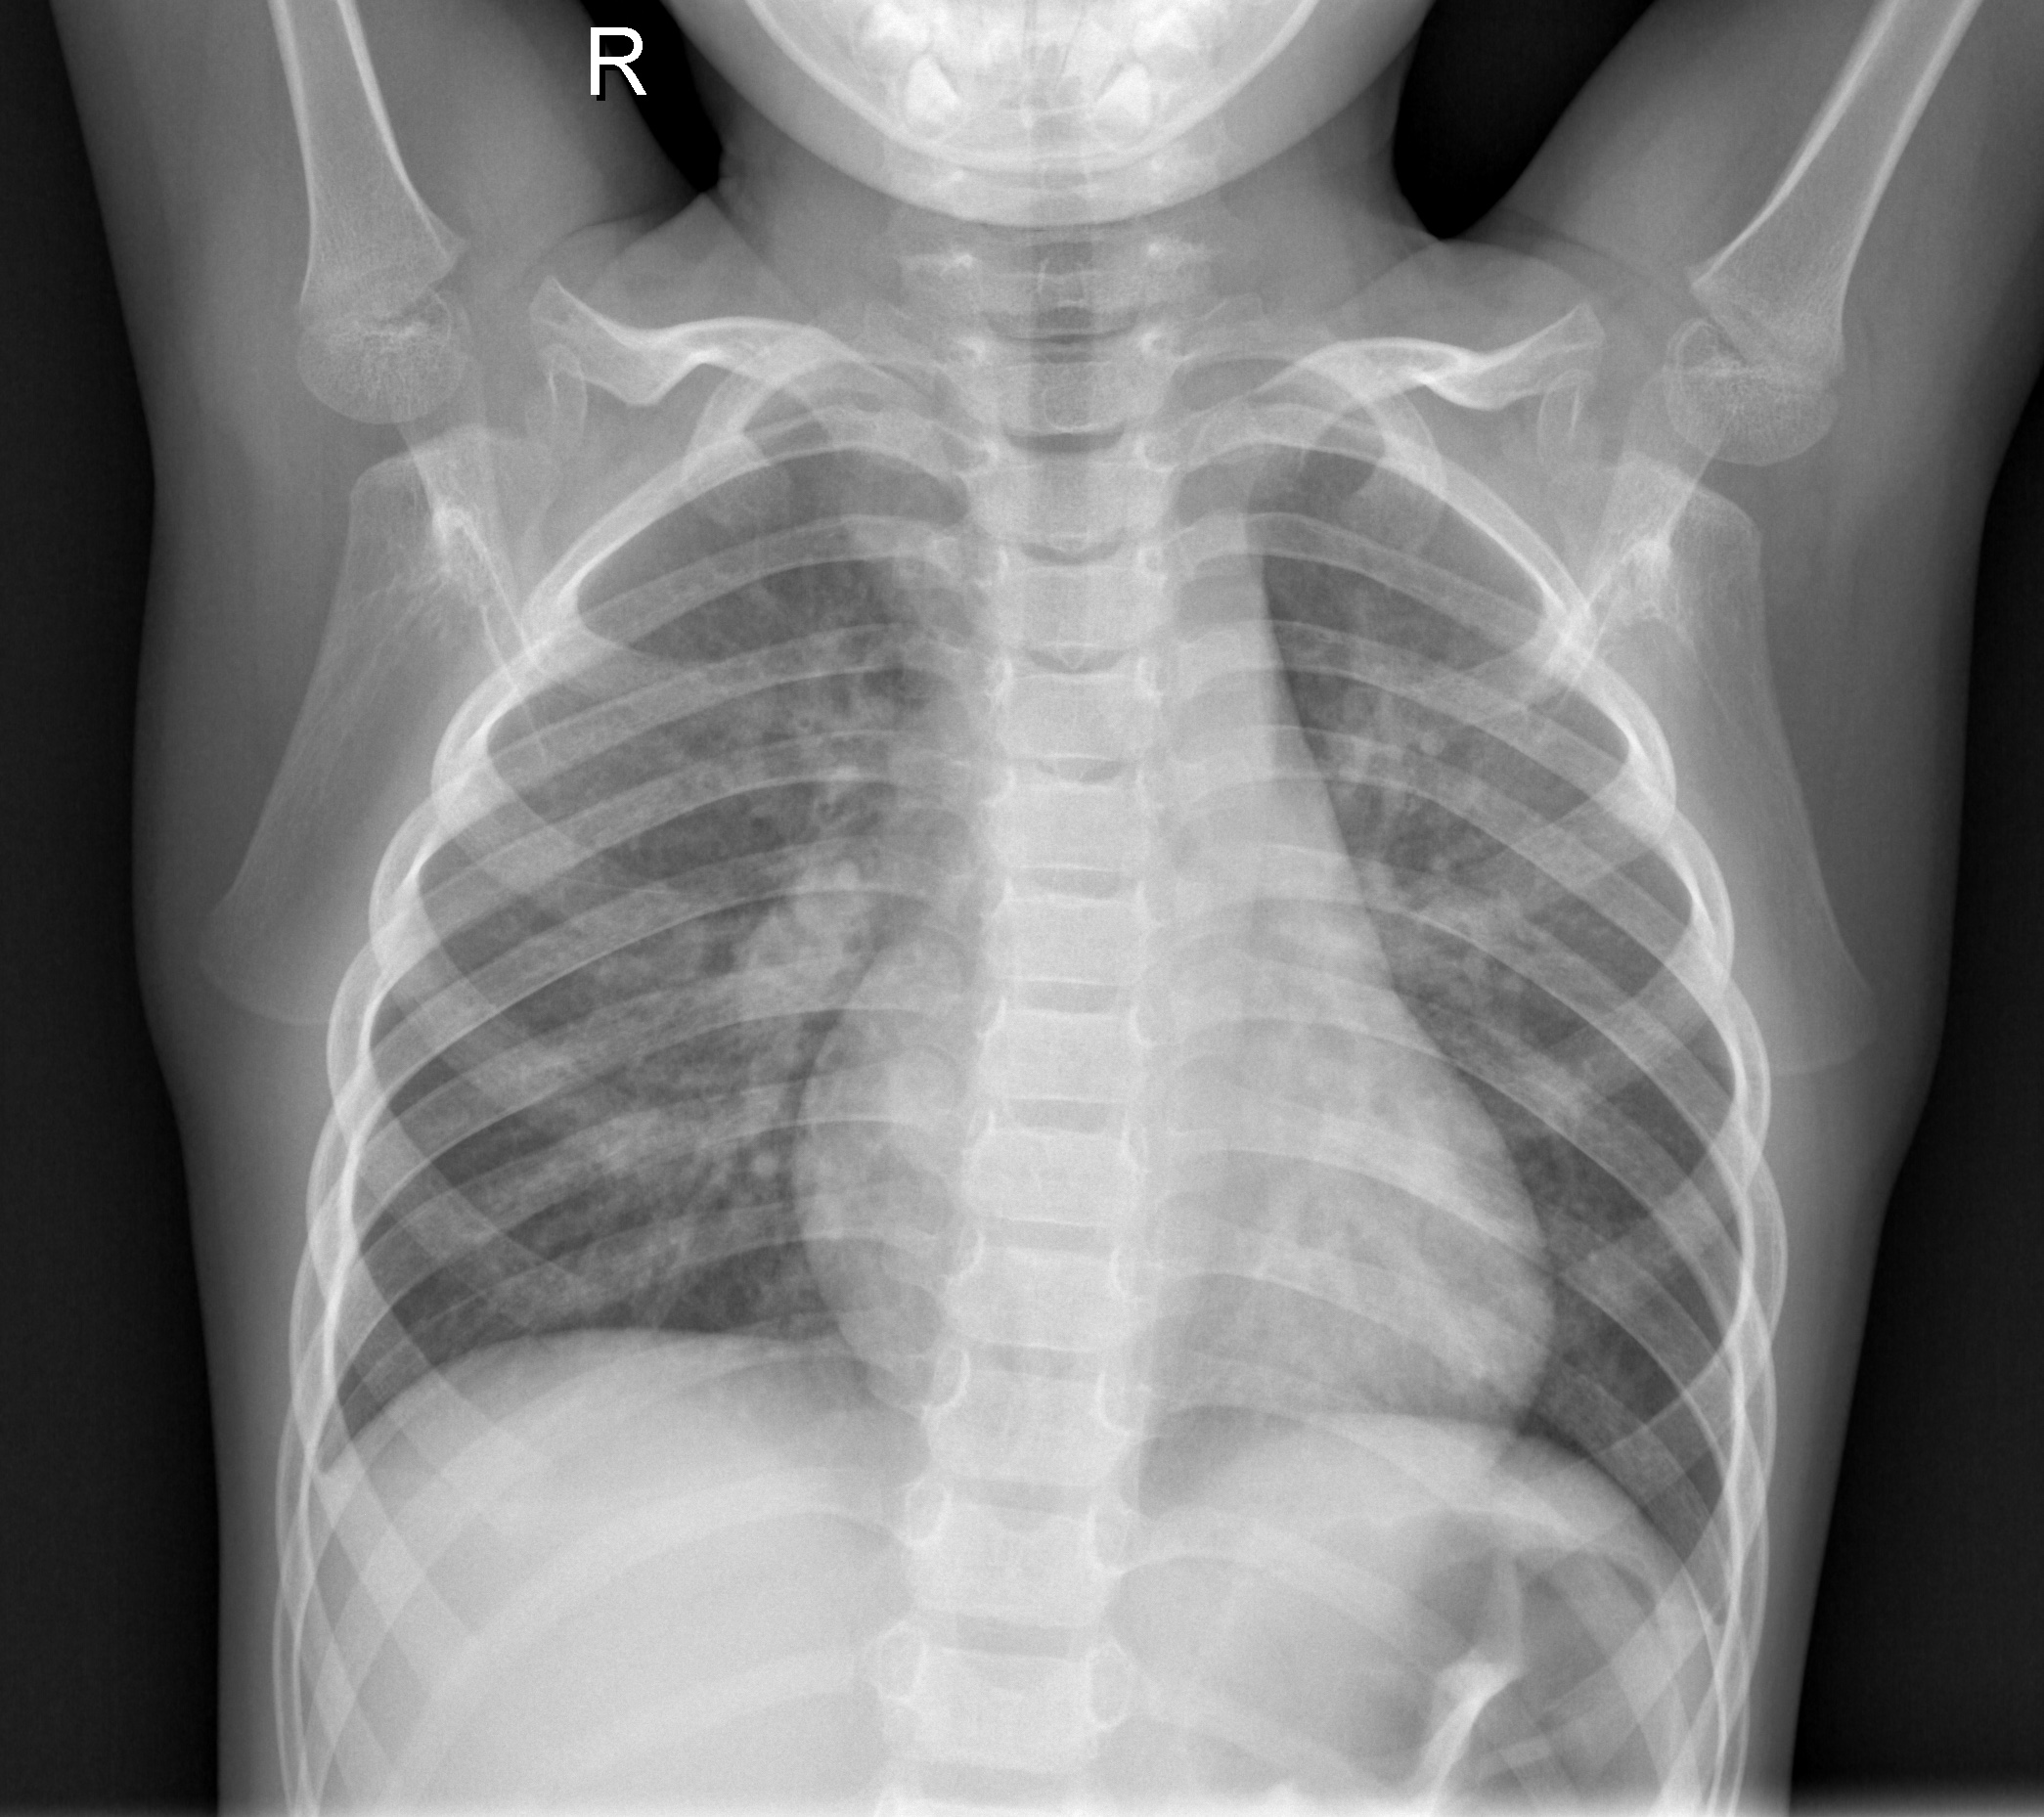

In [15]:
PIL.Image.open('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

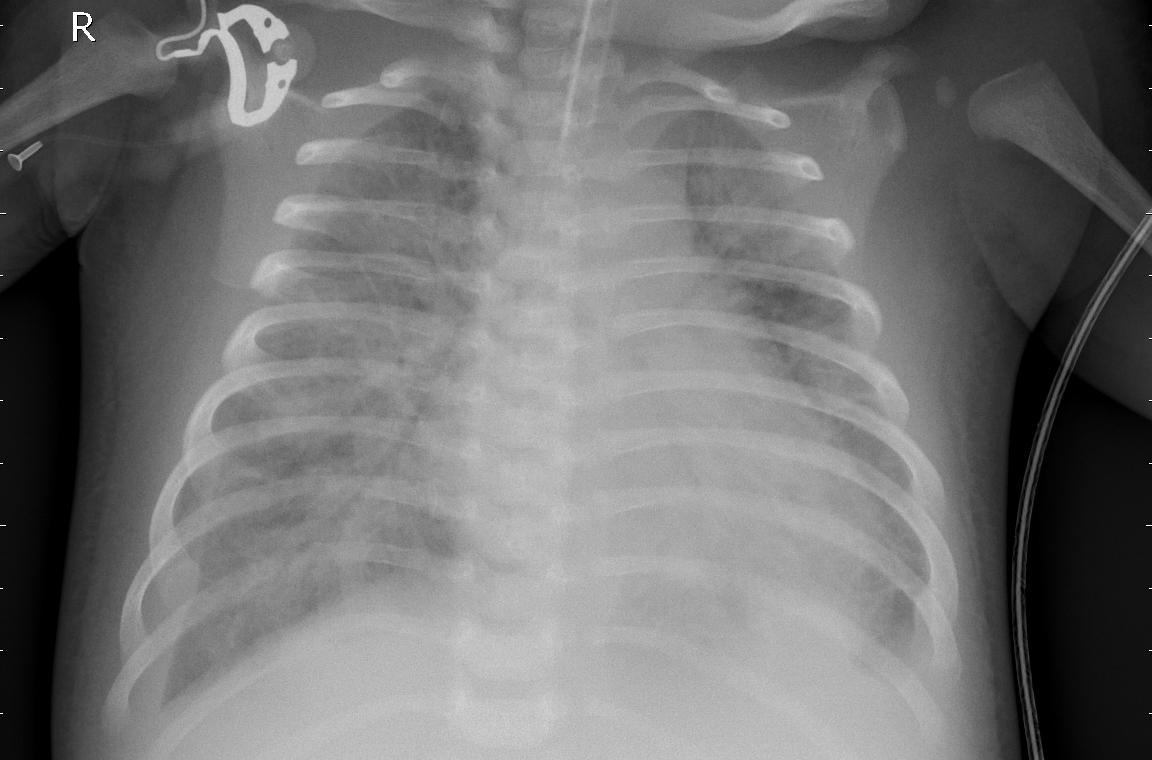

In [16]:
PIL.Image.open('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')

In [13]:
import tensorflow as tf

In [14]:
traning_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/train',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 5216 files belonging to 2 classes.


In [15]:
test_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/test',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 624 files belonging to 2 classes.


In [16]:
no_batch=tf.data.experimental.cardinality(test_ds)    # number of batches
Test_ds=test_ds.take(no_batch//5)  # take part for testing
val_ds=test_ds.skip(no_batch//5)   # take for valdation after make model

In [21]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
AUTOTUNE=tf.data.AUTOTUNE

training_ds = traning_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
Test_ds =Test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds= val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
model = tf.keras.Sequential([


    tf.keras.layers.Dense(32, input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(.25),

    tf.keras.layers.Dense(2, activation='softmax'),

])














In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 150, 150, 32)      128       
                                                                 
 dense_11 (Dense)            (None, 150, 150, 64)      2112      
                                                                 
 dense_12 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 dense_13 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 dropout_2 (Dropout)         (None, 150, 150, 64)      0         
                                                                 
 dense_14 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 dense_15 (Dense)            (None, 150, 150, 64)     

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [24]:
history=model.fit(traning_ds,epochs=15,validation_data=val_ds)

Epoch 1/15
82/82 [==============================] - 43s 450ms/step - loss: 99.4599 - accuracy: 0.7594 - val_loss: 18.4913 - val_accuracy: 0.3649
Epoch 2/15
82/82 [==============================] - 39s 449ms/step - loss: 15.0484 - accuracy: 0.8677 - val_loss: 13.1483 - val_accuracy: 0.6290
Epoch 3/15
82/82 [==============================] - 42s 465ms/step - loss: 10.9221 - accuracy: 0.8997 - val_loss: 10.4140 - val_accuracy: 0.6210
Epoch 4/15
82/82 [==============================] - 38s 435ms/step - loss: 8.4682 - accuracy: 0.9176 - val_loss: 8.2300 - val_accuracy: 0.6230
Epoch 5/15
82/82 [==============================] - 40s 456ms/step - loss: 6.8760 - accuracy: 0.9133 - val_loss: 6.5889 - val_accuracy: 0.6734
Epoch 6/15
82/82 [==============================] - 40s 447ms/step - loss: 5.7516 - accuracy: 0.9210 - val_loss: 5.7554 - val_accuracy: 0.6190
Epoch 7/15
82/82 [==============================] - 39s 444ms/step - loss: 4.8989 - accuracy: 0.9247 - val_loss: 5.0366 - val_accuracy: 

In [25]:
import matplotlib.pyplot as plt

In [26]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(training_acc, label = 'accuracy')
plt.plot(val_acc, label = 'val_accuracy')
plt.legend()

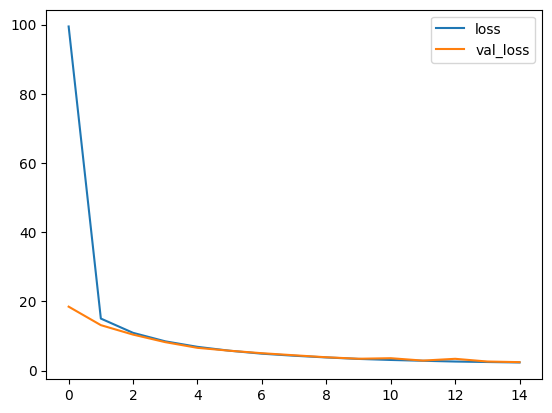

In [27]:
training_acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(training_acc, label = 'loss')
plt.plot(val_acc, label = 'val_loss')
plt.legend()

In [ ]:
train_loss, train_acc = model.evaluate(traning_ds)
test_loss, test_acc = model.evaluate(val_ds)

print("fianl train accuracy = {:.2f}, validation accuracy  = {:.2f}".format(train_acc*100, test_acc*100) )

8/8 [==============================] - 1s 184ms/step - loss: 0.5166 - accuracy: 0.7581
fianl train accuracy = 82.02, validation accuracy  = 75.81


In [ ]:
model.save('model_pneu2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np

In [ ]:
emotion_dict = {0: "Normal", 1: "Pneumonia"}

(150, 150, 3)
1/1 [==============================] - 0s 302ms/step
[0.75931215, 0.24068783]
Normal


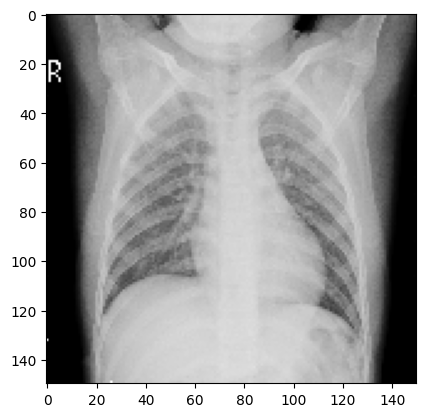

In [ ]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

(150, 150, 3)
1/1 [==============================] - 0s 22ms/step
[0.3803491, 0.6196509]
Pneumonia


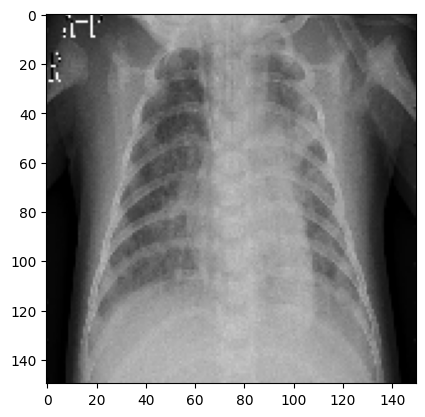

In [ ]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
# Extract labels from the dataset
test_labels = []
for _, label_batch in test_ds:
    test_labels.extend(tf.argmax(label_batch, axis=1))

# Convert labels to numpy array
test_labels = tf.stack(test_labels).numpy()

# Print the labels
print(test_labels)

[1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 1 0 

In [ ]:
test_labels

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
y_pred = model.predict(test_ds)

10/10 [==============================] - 5s 180ms/step


In [ ]:
y_pred

array([[0.7375105 , 0.26248947],
       [0.46687773, 0.5331223 ],
       [0.61599636, 0.38400364],
       ...,
       [0.55767816, 0.44232184],
       [0.4958521 , 0.5041479 ],
       [0.16312008, 0.8368799 ]], dtype=float32)

In [ ]:
y_pred = y_pred.tolist()

In [ ]:
y_pred

[[0.7375105023384094, 0.2624894678592682],
 [0.4668777287006378, 0.5331223011016846],
 [0.6159963607788086, 0.3840036392211914],
 [0.34507232904434204, 0.654927670955658],
 [0.5221624970436096, 0.47783753275871277],
 [0.6569960117340088, 0.3430040180683136],
 [0.6815530061721802, 0.3184469938278198],
 [0.5706344246864319, 0.4293656051158905],
 [0.3976871073246002, 0.6023128628730774],
 [0.2507513463497162, 0.7492486238479614],
 [0.701788067817688, 0.2982119619846344],
 [0.49585211277008057, 0.5041478872299194],
 [0.16494272649288177, 0.835057258605957],
 [0.4619182348251343, 0.5380817651748657],
 [0.5858014225959778, 0.4141985774040222],
 [0.5652481913566589, 0.43475180864334106],
 [0.6132404208183289, 0.38675951957702637],
 [0.5194382071495056, 0.4805617928504944],
 [0.4345605671405792, 0.5654394030570984],
 [0.7019517421722412, 0.2980482578277588],
 [0.260099858045578, 0.7399001121520996],
 [0.5487013459205627, 0.45129865407943726],
 [0.4195190966129303, 0.5804809331893921],
 [0.5465

In [ ]:
result = []
for img in y_pred:
  img_index = img.index(max(img))
  result.append(img_index)


result

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,


In [ ]:
y_pred = np.array(result)


In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
accuracy = accuracy_score(y_pred, test_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 52.72%


In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
plot_confusion_matrix(test_labels, y_pred, class_names=["Normal", "Peneumonia"])

10/10 [==============================] - 4s 184ms/step


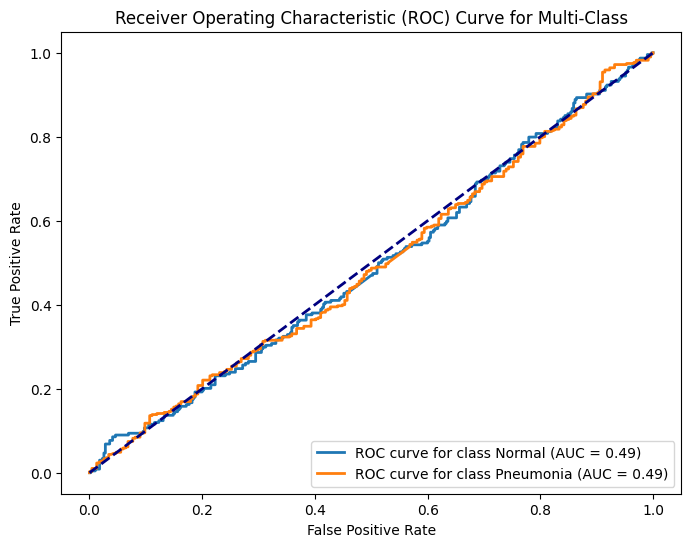

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve, auc

# Predict probabilities for each class
y_probs = model.predict(test_ds)
class_names=["Normal", "Pneumonia"]
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,